  # **The low-redshift $\frac{\partial n}{\partial z}$ of ** HI
  ### This code calculates an $n_0$ and an $\alpha$ via least-squares $\chi^{2}$ fit.
  <!-- TEASER_END -->

In [1]:
import scipy.optimize as optimization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.rcParams['axes.linewidth'] = 2
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
#mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

## Define the model  function for \\(\frac{\partial n}{\partial z}\\).

In [2]:
def dndz(z, n0, alpha):

    return n0*(1.0+z)**alpha

### Define the ploting function.

In [3]:
def plot_fit(zabs, dndzdat, dndzerr, popt):
    plt.clf()
    plt.plot(zabs, dndzdat, 'ro')
    z = np.arange(0, 5.5, 0.1)
    plt.plot(z, dndz(z, popt[0], popt[1]), 'k-')
    popt[0], popt[1]
    plt.errorbar(zabs, dndzdat, dndzerr, fmt='ro')
    plt.xlim(0.,4)
    plt.ylim(0,0.4)
    plt.xlabel(r'$z_{abs}$' , fontsize=40)
    plt.ylabel(r'$\frac{\partial n}{\partial z}_{DLA}$', fontsize=40)
    plt.minorticks_on()
    plt.tick_params(axis='both',color='k',length=5,width=2, labelsize=20)
    plt.tick_params(which='minor',axis='both', color='k',length=3,width=1)
    plt.show()

## Initialize the parameters as p0.

In [4]:
p0=[1.0,0.2]

## Results for other sets.

## Set 1: *WITH* the zero-point

 
 
   n0 =    0.026  \pm   0.004
   alpha = 1.707  \pm   0.108
 
 


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


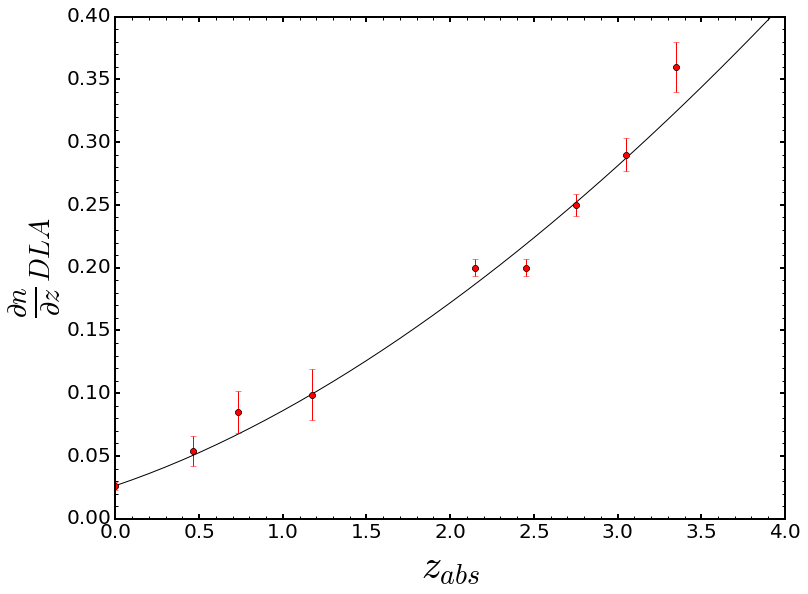

In [5]:
zabs   =[0.000,0.464,0.731,1.172,2.150,2.450,2.750,3.050,3.350] 
dndzdat=[0.026,0.054,0.085,0.099,0.200,0.200,0.250,0.290,0.360]
dndzerr=[0.003,0.012,0.017,0.020,0.007,0.007,0.009,0.013,0.020]
popt, pcov = optimization.curve_fit(dndz, zabs, dndzdat, p0,  dndzerr)
error = np.sqrt(pcov.diagonal())
print(" ")
print(" ")
print("   n0 =    %.3f" % popt[0] + '  \pm   %.3f' % error[0])
print("   alpha = %.3f" % popt[1] + '  \pm   %.3f' % error[1])
print(" ")
print(" ")
plot_fit(zabs, dndzdat, dndzerr, popt)

## Set 2: *WITHOUT* the zero-point

 
 
   n0 =    0.027  \pm   0.007
   alpha = 1.682  \pm   0.200
 
 


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


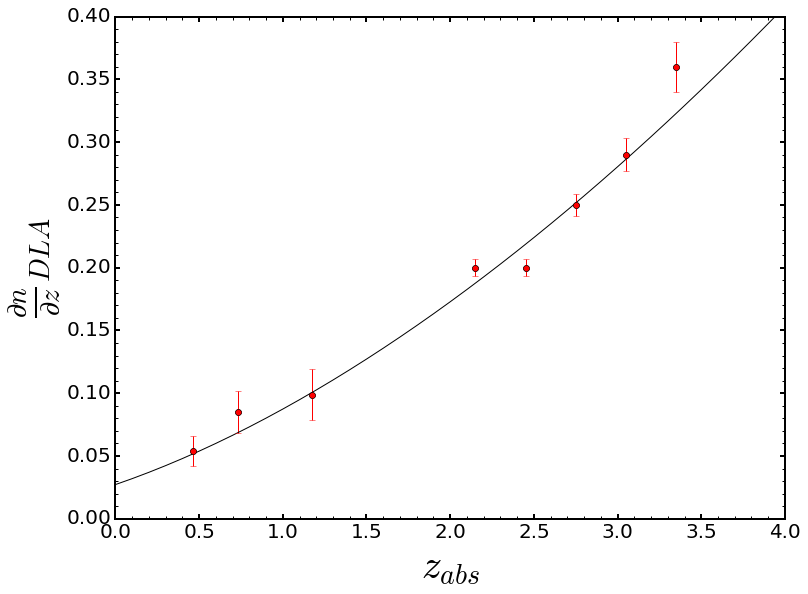

In [6]:
zabs   =[0.464, 0.731, 1.172, 2.150, 2.450, 2.750, 3.050, 3.350] 
dndzdat=[0.054, 0.085, 0.099, 0.200, 0.200, 0.250, 0.290, 0.360]
dndzerr=[0.012, 0.017, 0.020, 0.007, 0.007, 0.009, 0.013, 0.020]
popt, pcov = optimization.curve_fit(dndz, zabs, dndzdat, p0,  dndzerr)
error = np.sqrt(pcov.diagonal())
print(" ")
print(" ")
print("   n0 =    %.3f" % popt[0] + '  \pm   %.3f' % error[0])
print("   alpha = %.3f" % popt[1] + '  \pm   %.3f' % error[1])
print(" ")
print(" ")

plot_fit(zabs, dndzdat, dndzerr, popt)